In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [3]:
#Datos sobre la relación entre las horas de estudio y las horas de sueño y, su implicación en la parobación de un examen.

datos = pd.read_csv('dataset.csv', sep=",")
print(datos)

    Horas de estudio  Horas de sueno  Categoria
0           4.855064        9.639962          1
1           8.625440        0.058927          0
2           3.828192        0.723199          0
3           7.150955        3.899420          1
4           6.477900        8.198181          1
..               ...             ...        ...
95          0.022280        2.658428          0
96          7.630637        7.405351          1
97          3.684997        5.049965          0
98          7.484260        6.059396          1
99          2.030708        3.937267          0

[100 rows x 3 columns]


In [4]:
len(datos)

100

In [5]:
# Crear datos de entrenamiento (X) y categorías de salida (Y). X: las
# dos primeras columnas, Y: la tercera columna

#X, las variables independientes, seràn las 2 primeras columnas: [:,0:2] * la número 2 no está incluida, son la: 0 y 1. 
X = datos.values[:,0:2]

#Y, la variable objetivo será la columna número 2 referente a la categoria.
Y = datos.values[:,2]

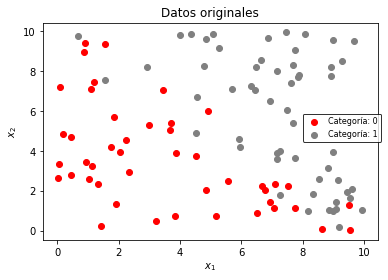

In [8]:
# Graficar
idx0 = np.where(Y==0)
idx1 = np.where(Y==1)

plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Categoría: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Categoría: 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')
plt.title('Datos originales')
plt.show()

In [13]:
np.random.seed(1)      

#Las variables de entrada serán 2, porque solo hay dos columnas: Horas de estudio y Horas de sueno.  
input_dim = X.shape[1]

# X.shape = (100, 2) ; X.shape[1] = 2

#La variable de salida u objetivo es unicamente 1, porque solo queremos saber si aprueba: 1, o repureba: 0.
#En este caso, la variable objetivo:Categoria, es binaria, porque solo tiene 2 valores, 0 o 1.
output_dim = 1                          

# Creamos el modelos con el método sequential, adherimos con add() la función dense() configuramos la dimensión
# de los datos de entrada y salida, utilizando la funciòn sigmoide, ya que, los valores resultantes variaran de
# 0 a 1.
modelo = Sequential()
modelo.add(Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

# #Se selecciono como optimizador el SGD: Gradiente Descendiente, que tiene por parametro el learning rate o tasa de aprendizaje  con lr=0.2, 
# función de error entropía binaria cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión).

sgd = SGD(lr=0.2)
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [14]:
#Entrenamiento (Forward propagation)

# Nùmero de épocas o iteraciones.
num_epochs = 1000

# Tamaño del lote (batch size), como son unicamente 100 datos, se utilizaran todo.
batch_size = X.shape[0]

# X.shape = (100, 2) ; X.shape[0] = 100

historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)


Epoch 1/1000
1/1 - 0s - loss: 1.3864 - accuracy: 0.3300
Epoch 2/1000
1/1 - 0s - loss: 1.1853 - accuracy: 0.5500
Epoch 3/1000
1/1 - 0s - loss: 0.7120 - accuracy: 0.5500
Epoch 4/1000
1/1 - 0s - loss: 0.6535 - accuracy: 0.5500
Epoch 5/1000
1/1 - 0s - loss: 0.6438 - accuracy: 0.5600
Epoch 6/1000
1/1 - 0s - loss: 0.6749 - accuracy: 0.5500
Epoch 7/1000
1/1 - 0s - loss: 0.6894 - accuracy: 0.5000
Epoch 8/1000
1/1 - 0s - loss: 0.8066 - accuracy: 0.5500
Epoch 9/1000
1/1 - 0s - loss: 0.6944 - accuracy: 0.5000
Epoch 10/1000
1/1 - 0s - loss: 0.8217 - accuracy: 0.5500
Epoch 11/1000
1/1 - 0s - loss: 0.6807 - accuracy: 0.5300
Epoch 12/1000
1/1 - 0s - loss: 0.7969 - accuracy: 0.5500
Epoch 13/1000
1/1 - 0s - loss: 0.6780 - accuracy: 0.5300
Epoch 14/1000
1/1 - 0s - loss: 0.7957 - accuracy: 0.5500
Epoch 15/1000
1/1 - 0s - loss: 0.6696 - accuracy: 0.5400
Epoch 16/1000
1/1 - 0s - loss: 0.7827 - accuracy: 0.5500
Epoch 17/1000
1/1 - 0s - loss: 0.6642 - accuracy: 0.5700
Epoch 18/1000
1/1 - 0s - loss: 0.7761 - 

Epoch 145/1000
1/1 - 0s - loss: 0.4121 - accuracy: 0.8700
Epoch 146/1000
1/1 - 0s - loss: 0.4134 - accuracy: 0.7800
Epoch 147/1000
1/1 - 0s - loss: 0.4098 - accuracy: 0.8700
Epoch 148/1000
1/1 - 0s - loss: 0.4108 - accuracy: 0.7900
Epoch 149/1000
1/1 - 0s - loss: 0.4075 - accuracy: 0.8600
Epoch 150/1000
1/1 - 0s - loss: 0.4082 - accuracy: 0.8000
Epoch 151/1000
1/1 - 0s - loss: 0.4054 - accuracy: 0.8600
Epoch 152/1000
1/1 - 0s - loss: 0.4058 - accuracy: 0.7900
Epoch 153/1000
1/1 - 0s - loss: 0.4033 - accuracy: 0.8600
Epoch 154/1000
1/1 - 0s - loss: 0.4034 - accuracy: 0.7900
Epoch 155/1000
1/1 - 0s - loss: 0.4013 - accuracy: 0.8500
Epoch 156/1000
1/1 - 0s - loss: 0.4012 - accuracy: 0.7900
Epoch 157/1000
1/1 - 0s - loss: 0.3993 - accuracy: 0.8500
Epoch 158/1000
1/1 - 0s - loss: 0.3991 - accuracy: 0.7900
Epoch 159/1000
1/1 - 0s - loss: 0.3975 - accuracy: 0.8500
Epoch 160/1000
1/1 - 0s - loss: 0.3971 - accuracy: 0.7900
Epoch 161/1000
1/1 - 0s - loss: 0.3957 - accuracy: 0.8600
Epoch 162/1000

Epoch 287/1000
1/1 - 0s - loss: 0.3416 - accuracy: 0.8700
Epoch 288/1000
1/1 - 0s - loss: 0.3413 - accuracy: 0.8700
Epoch 289/1000
1/1 - 0s - loss: 0.3410 - accuracy: 0.8700
Epoch 290/1000
1/1 - 0s - loss: 0.3407 - accuracy: 0.8700
Epoch 291/1000
1/1 - 0s - loss: 0.3404 - accuracy: 0.8700
Epoch 292/1000
1/1 - 0s - loss: 0.3402 - accuracy: 0.8700
Epoch 293/1000
1/1 - 0s - loss: 0.3399 - accuracy: 0.8700
Epoch 294/1000
1/1 - 0s - loss: 0.3396 - accuracy: 0.8700
Epoch 295/1000
1/1 - 0s - loss: 0.3393 - accuracy: 0.8700
Epoch 296/1000
1/1 - 0s - loss: 0.3391 - accuracy: 0.8700
Epoch 297/1000
1/1 - 0s - loss: 0.3388 - accuracy: 0.8700
Epoch 298/1000
1/1 - 0s - loss: 0.3385 - accuracy: 0.8700
Epoch 299/1000
1/1 - 0s - loss: 0.3383 - accuracy: 0.8700
Epoch 300/1000
1/1 - 0s - loss: 0.3380 - accuracy: 0.8700
Epoch 301/1000
1/1 - 0s - loss: 0.3377 - accuracy: 0.8700
Epoch 302/1000
1/1 - 0s - loss: 0.3375 - accuracy: 0.8700
Epoch 303/1000
1/1 - 0s - loss: 0.3372 - accuracy: 0.8700
Epoch 304/1000

Epoch 429/1000
1/1 - 0s - loss: 0.3113 - accuracy: 0.8700
Epoch 430/1000
1/1 - 0s - loss: 0.3112 - accuracy: 0.8700
Epoch 431/1000
1/1 - 0s - loss: 0.3110 - accuracy: 0.8700
Epoch 432/1000
1/1 - 0s - loss: 0.3108 - accuracy: 0.8700
Epoch 433/1000
1/1 - 0s - loss: 0.3107 - accuracy: 0.8700
Epoch 434/1000
1/1 - 0s - loss: 0.3105 - accuracy: 0.8700
Epoch 435/1000
1/1 - 0s - loss: 0.3104 - accuracy: 0.8700
Epoch 436/1000
1/1 - 0s - loss: 0.3102 - accuracy: 0.8700
Epoch 437/1000
1/1 - 0s - loss: 0.3101 - accuracy: 0.8700
Epoch 438/1000
1/1 - 0s - loss: 0.3099 - accuracy: 0.8700
Epoch 439/1000
1/1 - 0s - loss: 0.3097 - accuracy: 0.8700
Epoch 440/1000
1/1 - 0s - loss: 0.3096 - accuracy: 0.8700
Epoch 441/1000
1/1 - 0s - loss: 0.3094 - accuracy: 0.8700
Epoch 442/1000
1/1 - 0s - loss: 0.3093 - accuracy: 0.8700
Epoch 443/1000
1/1 - 0s - loss: 0.3091 - accuracy: 0.8700
Epoch 444/1000
1/1 - 0s - loss: 0.3090 - accuracy: 0.8700
Epoch 445/1000
1/1 - 0s - loss: 0.3088 - accuracy: 0.8700
Epoch 446/1000

Epoch 571/1000
1/1 - 0s - loss: 0.2929 - accuracy: 0.8800
Epoch 572/1000
1/1 - 0s - loss: 0.2928 - accuracy: 0.8800
Epoch 573/1000
1/1 - 0s - loss: 0.2927 - accuracy: 0.8800
Epoch 574/1000
1/1 - 0s - loss: 0.2926 - accuracy: 0.8800
Epoch 575/1000
1/1 - 0s - loss: 0.2925 - accuracy: 0.8800
Epoch 576/1000
1/1 - 0s - loss: 0.2924 - accuracy: 0.8800
Epoch 577/1000
1/1 - 0s - loss: 0.2923 - accuracy: 0.8800
Epoch 578/1000
1/1 - 0s - loss: 0.2922 - accuracy: 0.8800
Epoch 579/1000
1/1 - 0s - loss: 0.2921 - accuracy: 0.8800
Epoch 580/1000
1/1 - 0s - loss: 0.2920 - accuracy: 0.8800
Epoch 581/1000
1/1 - 0s - loss: 0.2919 - accuracy: 0.8800
Epoch 582/1000
1/1 - 0s - loss: 0.2918 - accuracy: 0.8800
Epoch 583/1000
1/1 - 0s - loss: 0.2917 - accuracy: 0.8800
Epoch 584/1000
1/1 - 0s - loss: 0.2916 - accuracy: 0.8800
Epoch 585/1000
1/1 - 0s - loss: 0.2915 - accuracy: 0.8800
Epoch 586/1000
1/1 - 0s - loss: 0.2914 - accuracy: 0.8800
Epoch 587/1000
1/1 - 0s - loss: 0.2913 - accuracy: 0.8800
Epoch 588/1000

Epoch 713/1000
1/1 - 0s - loss: 0.2803 - accuracy: 0.8800
Epoch 714/1000
1/1 - 0s - loss: 0.2803 - accuracy: 0.8800
Epoch 715/1000
1/1 - 0s - loss: 0.2802 - accuracy: 0.8800
Epoch 716/1000
1/1 - 0s - loss: 0.2801 - accuracy: 0.8800
Epoch 717/1000
1/1 - 0s - loss: 0.2800 - accuracy: 0.8800
Epoch 718/1000
1/1 - 0s - loss: 0.2800 - accuracy: 0.8800
Epoch 719/1000
1/1 - 0s - loss: 0.2799 - accuracy: 0.8800
Epoch 720/1000
1/1 - 0s - loss: 0.2798 - accuracy: 0.8800
Epoch 721/1000
1/1 - 0s - loss: 0.2797 - accuracy: 0.8800
Epoch 722/1000
1/1 - 0s - loss: 0.2797 - accuracy: 0.8800
Epoch 723/1000
1/1 - 0s - loss: 0.2796 - accuracy: 0.8800
Epoch 724/1000
1/1 - 0s - loss: 0.2795 - accuracy: 0.8700
Epoch 725/1000
1/1 - 0s - loss: 0.2795 - accuracy: 0.8700
Epoch 726/1000
1/1 - 0s - loss: 0.2794 - accuracy: 0.8700
Epoch 727/1000
1/1 - 0s - loss: 0.2793 - accuracy: 0.8700
Epoch 728/1000
1/1 - 0s - loss: 0.2792 - accuracy: 0.8700
Epoch 729/1000
1/1 - 0s - loss: 0.2792 - accuracy: 0.8700
Epoch 730/1000

Epoch 855/1000
1/1 - 0s - loss: 0.2712 - accuracy: 0.8900
Epoch 856/1000
1/1 - 0s - loss: 0.2711 - accuracy: 0.8900
Epoch 857/1000
1/1 - 0s - loss: 0.2710 - accuracy: 0.8900
Epoch 858/1000
1/1 - 0s - loss: 0.2710 - accuracy: 0.8900
Epoch 859/1000
1/1 - 0s - loss: 0.2709 - accuracy: 0.8900
Epoch 860/1000
1/1 - 0s - loss: 0.2709 - accuracy: 0.8900
Epoch 861/1000
1/1 - 0s - loss: 0.2708 - accuracy: 0.8900
Epoch 862/1000
1/1 - 0s - loss: 0.2708 - accuracy: 0.8900
Epoch 863/1000
1/1 - 0s - loss: 0.2707 - accuracy: 0.8900
Epoch 864/1000
1/1 - 0s - loss: 0.2707 - accuracy: 0.8900
Epoch 865/1000
1/1 - 0s - loss: 0.2706 - accuracy: 0.8900
Epoch 866/1000
1/1 - 0s - loss: 0.2705 - accuracy: 0.8900
Epoch 867/1000
1/1 - 0s - loss: 0.2705 - accuracy: 0.8900
Epoch 868/1000
1/1 - 0s - loss: 0.2704 - accuracy: 0.8900
Epoch 869/1000
1/1 - 0s - loss: 0.2704 - accuracy: 0.8900
Epoch 870/1000
1/1 - 0s - loss: 0.2703 - accuracy: 0.8900
Epoch 871/1000
1/1 - 0s - loss: 0.2703 - accuracy: 0.8900
Epoch 872/1000

Epoch 997/1000
1/1 - 0s - loss: 0.2641 - accuracy: 0.8900
Epoch 998/1000
1/1 - 0s - loss: 0.2641 - accuracy: 0.8900
Epoch 999/1000
1/1 - 0s - loss: 0.2640 - accuracy: 0.8900
Epoch 1000/1000
1/1 - 0s - loss: 0.2640 - accuracy: 0.8900


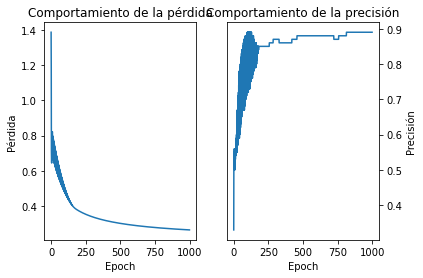

In [16]:
# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()


# En el gráfico de la izquierda:
Relación entre perdida y epocas, mientras que las iteraciones (epocas) aumentan el error(perida) disminuye.



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


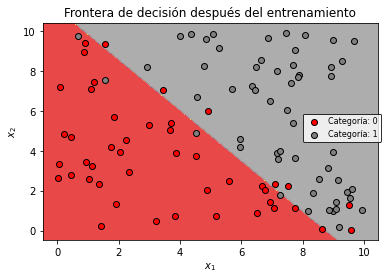

In [17]:
def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Categoría: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Categoría: 1')
    plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

dibujar_frontera(X,Y,modelo,'Frontera de decisión después del entrenamiento')

#Dibijaremos la frontera de decisión, con la intensión de conocer que tan buena es nuestra cladificacion.